<a href="https://colab.research.google.com/github/rmarvel23/projects/blob/main/ProyectoPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto **Python**

In [11]:
import pandas as pd
df = pd.read_csv(r"/content/train.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 100: invalid start byte

Nos quedamos con el train de sentiment edad

In [18]:
import pandas as pd
dataset = pd.read_csv("/content/train.csv", encoding='unicode_escape', on_bad_lines='skip')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27437 entries, 0 to 27436
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   textID                       27437 non-null  object 
 1   text                         20923 non-null  object 
 2   selected_text                20920 non-null  object 
 3   sentiment                    20925 non-null  object 
 4   Time of Tweet                20925 non-null  object 
 5   Age of User                  20925 non-null  object 
 6   Country                      20925 non-null  object 
 7   Population -2020             20925 non-null  float64
 8   Land Area (Km²)              20925 non-null  object 
 9   Density (P/Km²);;;;;;;;;;;;  20890 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.1+ MB


In [20]:
import pandas as pd

class DataLoader:
    def __init__(self,file_path,encoding='unicode_escape'):
      self.file_path = file_path
      self.__encoding= encoding
      self.dataset = None

    def load_data(self):
      try:
        self.dataset = pd.read_csv(self.file_path, encoding=self.__encoding,on_bad_lines='skip')
        print("Data successfully loaded.")
      except Exception as e:
        print(f"Error loading data: {e}")

    def show_sample(self, n=5):
      if self.dataset is not None:
        return self.dataset.sample(n)
      else:
        print("No data loaded.")

In [31]:
dataset.isnull().sum()

textID                            0
text                           6514
selected_text                  6517
sentiment                      6512
Time of Tweet                  6512
Age of User                    6512
Country                        6512
Population -2020               6512
Land Area (Km²)                6512
Density (P/Km²);;;;;;;;;;;;    6547
dtype: int64

In [49]:
#LIMPIEZA
def clean_columns_nulls(dataframe):
    # Eliminar filas con valores nulos en las columnas especificadas
    dataframe.dropna(subset=["selected_text", "sentiment", "Time of Tweet", "Age of User", "Country"], inplace=True)
    # Eliminar columnas innecesarias
    dataframe.drop(['textID', 'selected_text', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'], axis=1, inplace=True, errors='ignore')
    # Devolver el conteo de valores nulos por columna
    return dataframe.isnull().sum()

In [51]:
clean_columns_nulls(dataset)

KeyError: ['selected_text']

In [21]:
proyecto1 = DataLoader("/content/train.csv")

In [22]:
proyecto1.load_data()

Data successfully loaded.


In [23]:
proyecto1.show_sample(10)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²);;;;;;;;;;;;
16587,87eed4dc97,its it done?,its it done?,neutral,noon,60-70,Kyrgyzstan,6524195.0,191800,34;;;;;;;;;;;;
17969,f00076628b,Your welcome hun! They are all amazing peo...,! They are all amazing peopl,positive,morning,46-60,Turkmenistan,6031200.0,469930,13;;;;;;;;;;;;
16948,bc5a131667,HAPPY JUDDDAY,HAPPY JUDDDAY,positive,night,70-100,Pakistan,220892340.0,770880,287;;;;;;;;;;;;
15698,"c3bb37493e,""http://twitpic.com/4jerc view of A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14515,59cd3e2b14,just now i know how twitter exactly work,just now i know how twitter exactly work,neutral,noon,21-30,Lebanon,6825445.0,10230,667;;;;;;;;;;;;
5938,4fa4f2bde8,what dey do homie? I wish it would stop raini...,what dey do homie? I wish it would stop rainin...,neutral,morning,0-20,Trinidad and Tobago,1399488.0,5130,273;;;;;;;;;;;;
21317,40c16b0da7,cant wait for prom and after prom party on friday,cant wait,positive,noon,21-30,Chad,16425864.0,1259200,13;;;;;;;;;;;;
19560,714d7c7a34,On train with at least two gaggles of teenager...,On train with at least two gaggles of teenager...,neutral,morning,0-20,Singapore,5850342.0,700,8358;;;;;;;;;;;;
16676,"73bc6c101b,""It`s hot. I could turn on the A/C...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11888,63549ea2e4,Going with Chantal to her aunt.,Going with Chantal to her aunt.,neutral,noon,21-30,Fiji,896445.0,18270,49;;;;;;;;;;;;


In [24]:
#class ColumnDeleter:
    #def __init__(self):
     # pass

    #def remove_columns(self, dataset):
       # columns_to_remove = ['textID', 'selected_text', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']
        #if not isinstance(dataset, pd.DataFrame):
         # raise TypeError("Your dataset must be a Pandas DataFrame")
        #dataset.drop(columns=columns_to_remove, inplace=True, errors='ignore')
        #return dataset.columns

In [ ]:
proyecto2 = ColumnDeleter()

In [ ]:
proyecto2.remove_columns(proyecto1.dataset)

Index(['text', 'sentiment', 'Time of Tweet', 'Age of User', 'Country'], dtype='object')

In [29]:
import matplotlib.pyplot as plt

class Country:

    def __init__(self, filepath):
      try:
            self.dataframe = pd.read_csv(filepath, encoding='unicode_escape', on_bad_lines='skip')
        except Exception as e:
            print(f"Error reading the CSV file: {e}")

    def get_positive(self, country):
      try:
        return self.dataframe[(self.dataframe['Country'] == country) & (self.dataframe['sentiment'] == "positive")].shape[0]
      except Exception as e:
        print("Error", e)

    def get_tweets_countries(self, country):
      try:
        sentiment_counts = self.dataframe[self.dataframe['Country'] == country]['sentiment'].value_counts()
        sentiment_counts.plot(kind='bar', figsize=(10, 6))
        plt.title(f'Tweets in {country}')
        plt.xlabel('Sentiment')
        plt.ylabel('Number of Tweets')
        plt.show()
      except Exception as e:
            print("Error:", e)

    def get_negative(self, country):
        try:
            return self.dataframe[(self.dataframe['Country'] == country) & (self.dataframe['sentiment'] == "negative")].shape[0]
        except Exception as e:
            print("Error", e)
    def compare_sentiment_between_countries(self, countries):
    try:
        sentiment_counts = self.dataframe[self.dataframe['Country'].isin(countries)].groupby(['Country', 'sentiment']).size().unstack()
        sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title('Sentiment Comparison Between Countries')
        plt.xlabel('Country')
        plt.ylabel('Number of Tweets')
        plt.show()
    except Exception as e:
        print(f"Error comparing sentiment between countries: {e}")

class Hour:
    #PONER ESTO EN CLASES DIFERENTES O EN LA MISMA CLASE DE VISUALIZACIÓN?

    def __init__(self, filepath):
      try:
            self.dataframe = pd.read_csv(filepath, encoding='unicode_escape', on_bad_lines='skip')
        except Exception as e:
            print(f"Error reading the CSV file: {e}")

    def get_tweets_by_hour(self, country):
        try:
            hour_counts_ self.dataframe[self.dataframe['Country'] == country]['Time of Tweet'].value_counts().sort_index()
            hour_counts.plot(kind='bar', figsize=(10, 6))
            plt.title(f'Tweets by Hour of the Day in {country}')
            plt.xlabel('Hour of the Day')
            plt.ylabel('Number of Tweets')
            plt.show()
        except Exception as e:
            print(f"Error plotting tweets by hour for {country}: {e}")
    def get_sentiment_by_age_range(self, country):
        try:
            age_sentiment_counts = self.dataframe[self.dataframe['Country'] == country].groupby(['Age of User', 'sentiment']).size().unstack().fillna(0)?????
            age_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
            plt.title(f'Sentiment Distribution by Age Range in {country}')
            plt.xlabel('Age Range')
            plt.ylabel('Number of Tweets')
            plt.show()
        except Exception as e:
            print(f"Error plotting sentiment by age range for {country}: {e}")




Hacer funciones para: obtener tuits negativos y neutros por país
Obtener gráficas por países de tuis negativos, neutros y positivos
Limpiar de alguna forma la edad y hacer clase con gráficos para la edad por tipo de tuit.

In [ ]:
project23 = Country()

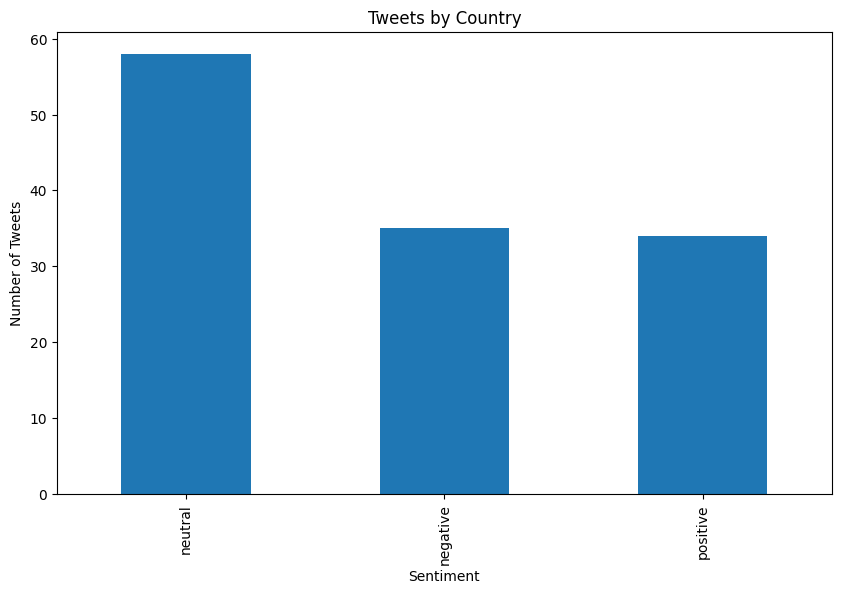

In [ ]:
project23.get_tweets_countries(proyecto1.dataset, "Switzerland")

In [ ]:
positivo = Country()

In [ ]:
positivo.get_positive(proyecto1.dataset, "Colombia")

48

In [99]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def tokenize_text(text):
    return word_tokenize(text)

def tokenize_text_negative(dataset):
     try:
        negative_tweets = dataset[dataset['sentiment'] == 'negative']
        negative_tweets['tokens'] = negative_tweets['text'].apply(tokenize_text)
        negative_words = [word for tokens in negative_tweets['tokens'] for word in tokens]
        bag_of_words = Counter(negative_words)
        return bag_of_words
     except Exception as e:
        print(f"Error creating bag of words: {e}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
bags_of_words = tokenize_text_negative(dataset)

<ipython-input-99-725c73440e44>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['tokens'] = negative_tweets['text'].apply(tokenize_text)


In [101]:
bags_of_words

Counter({'Sooo': 5,
         'SAD': 8,
         'I': 2717,
         'will': 145,
         'miss': 320,
         'you': 672,
         'here': 125,
         'in': 748,
         'San': 4,
         'Diego': 2,
         '!': 3181,
         'my': 1341,
         'boss': 5,
         'is': 938,
         'bullying': 1,
         'me': 729,
         '...': 1051,
         'what': 157,
         'interview': 3,
         'leave': 38,
         'alone': 24,
         'My': 175,
         'Sharpie': 1,
         'running': 17,
         'DANGERously': 1,
         'low': 10,
         'on': 564,
         'ink': 1,
         'i': 1387,
         'want': 177,
         'to': 2056,
         'go': 286,
         'music': 25,
         'tonight': 97,
         'but': 358,
         'lost': 73,
         'voice': 14,
         '.': 3156,
         'back': 140,
         'home': 139,
         'now': 321,
         'gon': 109,
         'na': 190,
         'every': 13,
         'one': 190,
         '`': 2531,
         'm': 631,
  

In [102]:
def words_filtered(words):
    nm_words = ["her", "there", "back", "will", "still", "has", "what", "when", "time"
                "about", "know", "feel", "too", "don", "your", "much", "think"
                "this", "like", "with", "out", "even", "did", "them"]
    cleaned_words = []
    for w in words:
        if w in stopwords.words("english"):
            pass
        elif w in nm_words:
            pass
        elif len(w) < 3:
            pass
        else:
            cleaned_words.append(w)
    return cleaned_words


In [103]:
words_filtered(bags_of_words)

['Sooo',
 'SAD',
 'miss',
 'San',
 'Diego',
 'boss',
 'bullying',
 '...',
 'interview',
 'leave',
 'alone',
 'Sharpie',
 'running',
 'DANGERously',
 'low',
 'ink',
 'want',
 'music',
 'tonight',
 'lost',
 'voice',
 'home',
 'gon',
 'every',
 'one',
 'sorry',
 'way',
 'Malaysia',
 'internet',
 'access',
 'Twit',
 'Went',
 'sleep',
 'power',
 'cut',
 'Noida',
 'Power',
 'working',
 'consolation',
 'got',
 'BMI',
 'tested',
 'hahaha',
 'says',
 'obesed',
 'well',
 'unhappy',
 'minutes',
 'Born',
 'raised',
 'NYC',
 'living',
 'Texas',
 'past',
 'years',
 'soooooo',
 'sleeeeepy',
 'last',
 'day',
 'school',
 'today',
 '....',
 'sniffle',
 'egh',
 'blah',
 'boooooooooooo',
 'dunno',
 'wan',
 'work',
 'HANGOVERS',
 'SUCKKKKKK',
 'drunk',
 'mess',
 'case',
 'new',
 'week',
 'thrilled',
 'mine',
 'dissappointed',
 'days',
 'Torn',
 'ace',
 'hearts',
 'Hunchback',
 'give',
 'easily',
 'mannnn',
 '.....',
 'iphone',
 'jealous',
 'http',
 '//bit.ly/NgnaR',
 'sooo',
 'tired',
 'Sick',
 'With',
 'f

In [81]:
#PASAR LAS PALABRAS A MINÚSCULAS, QUITAR SÍMBOLOS DE PUNTUACIÓN, MOSTRAR LAS MÁS FRECUENTES CON FREQDIST
# HACER LO MISMO CON LAS POSITIVAS
#HACER UN WORDCLOUD
#INTENTAR HACER ALGO DE STEMMATIZAR O LEMMATIZAR
#PREDECIR EL SENTIMIENTO DE UN TUIT POR SUS PALABRAS

[]
